In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_digits
#cluster_centers_
#inertia_

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
dataset = sns.load_dataset('geyser')

In [5]:
dataset.head

<bound method NDFrame.head of      duration  waiting   kind
0       3.600       79   long
1       1.800       54  short
2       3.333       74   long
3       2.283       62  short
4       4.533       85   long
..        ...      ...    ...
267     4.117       81   long
268     2.150       46  short
269     4.417       90   long
270     1.817       46  short
271     4.467       74   long

[272 rows x 3 columns]>

In [7]:
LE = LabelEncoder()
dataset['kind_numeric'] = LE.fit_transform(dataset['kind'])
dataset.head()

,duration,waiting,kind,kind_numeric
0,3.600,79,long,0
1,1.800,54,short,1
2,3.333,74,long,0
3,2.283,62,short,1
4,4.533,85,long,0


In [8]:
dataset.dtypes

duration        float64
waiting           int64
kind             object
kind_numeric      int32
dtype: object

In [13]:
X = dataset[['duration','waiting','kind_numeric']]

C:\Users\Ahmed Iftekher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ahmed Iftekher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ahmed Iftekher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ahmed Iftekher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

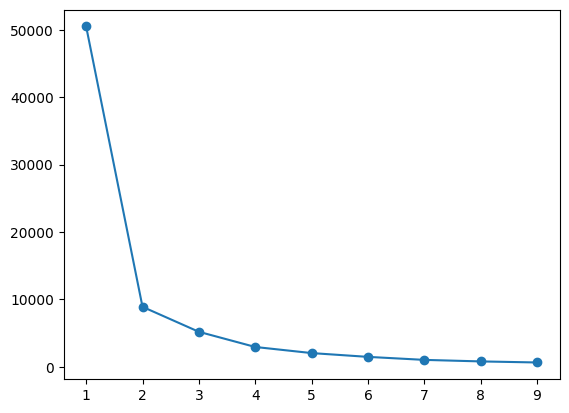

In [14]:
arr = []
for k in range(1,10):
    t = KMeans(n_clusters=k)
    t.fit(X)
    arr.append(t.inertia_)
    
plt.plot(range(1,10),arr,marker='o')
    

In [15]:
model = KMeans(n_clusters=3).fit(X)

C:\Users\Ahmed Iftekher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
model.cluster_centers_

array([[4.10036047e+00, 7.47674419e+01, 6.97674419e-02],
       [2.05673404e+00, 5.40531915e+01, 1.00000000e+00],
       [4.37731522e+00, 8.44891304e+01, 3.88578059e-16]])

In [17]:
dd = model.predict(X)
dataset['cluster'] =dd
dataset.head

<bound method NDFrame.head of      duration  waiting   kind  kind_numeric  cluster
0       3.600       79   long             0        0
1       1.800       54  short             1        1
2       3.333       74   long             0        0
3       2.283       62  short             1        1
4       4.533       85   long             0        2
..        ...      ...    ...           ...      ...
267     4.117       81   long             0        2
268     2.150       46  short             1        1
269     4.417       90   long             0        2
270     1.817       46  short             1        1
271     4.467       74   long             0        0

[272 rows x 5 columns]>

<Axes: >

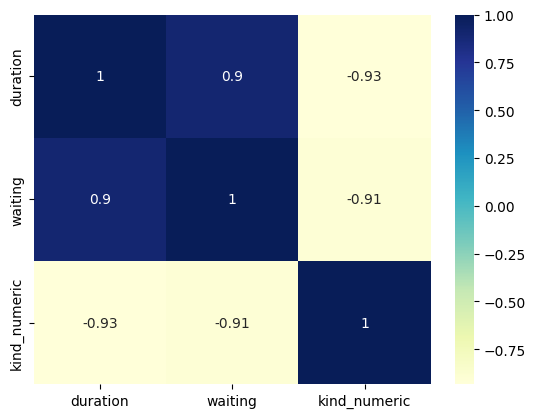

In [18]:
correlation = X.corr()
sns.heatmap(correlation,annot=True,cmap='YlGnBu')